## Exploratory Data Analysis and Preprocessing

In [1]:
%pylab inline
import pandas as pd
import os
# data visualization
import matplotlib.pyplot as plt
# NLP
import nltk
# Seaborn
import seaborn as sns
#Warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Change current working directory to the data folder
os.getcwd()
os.chdir("E:\Insofe\PH.D\PHD_ML")

In [3]:
# Read Train file into pandas
df = pd.read_csv("Train-1554810061973.csv")

In [4]:
df['len'] = [len(x) for x in df['reviewtext']]

In [5]:
df.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,len
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",Nice Marriot View of my king bed room,good,43
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","Good hotel, charges for internet access The Ma...",good,1170
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",Small but adequate rooms If you have an early ...,good,668
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","Better than average, some noisy rooms I have s...",good,3529
4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007",Ordinary Although it is highly rated in these ...,bad,1143


In [6]:
df['len'].describe()

count    6287.000000
mean      915.279307
std       755.205845
min         5.000000
25%       443.000000
50%       757.000000
75%      1190.000000
max      7445.000000
Name: len, dtype: float64

### Understanding the Distribution of target varaible with length

### len vs Excellent Sentiment

mean = 825.531202435312
std = 668.7952702899271


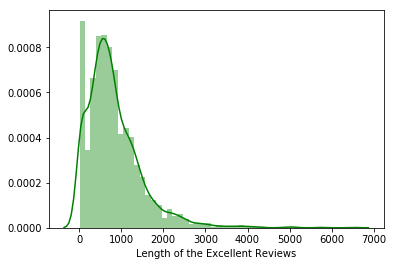

In [7]:
excellent = df[(df['Sentiment'] == 'excellent')]
plot = sns.distplot(excellent['len'],label='Distribution of Excellent Reviews',axlabel='Length of the Excellent Reviews',color="g")
fig = plot.get_figure()
fig.savefig("pos_distribution.png")
print ('mean =',mean(excellent['len']))
print ('std =', std(excellent['len']))

### len Vs Good Sentiment

mean = 896.0662931839403
std = 723.2834030105421


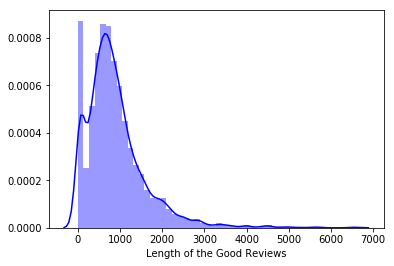

In [8]:
good = df[(df['Sentiment'] == 'good')]
plot = sns.distplot(good['len'],label='Distribution of Good Reviews',axlabel='Length of the Good Reviews', color="b")
fig = plot.get_figure()
fig.savefig("good_distribution.png")
print( 'mean =', mean(good['len']))
print ('std =', std(good['len']))

### len vs bad Sentiment

mean = 1131.6210335448777
std = 930.0058528325673


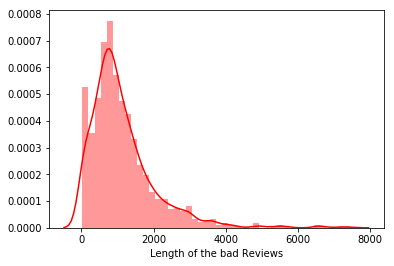

In [9]:
bad = df[(df['Sentiment'] == 'bad')]
plot = sns.distplot(bad['len'],label='Distribution of bad Reviews',axlabel='Length of the bad Reviews', color="r")
fig = plot.get_figure()
fig.savefig("bad_distribution.png")
print( 'mean =', mean(bad['len']))
print ('std =', std(bad['len']))

In [10]:
def len_vis(data_col):
    t_col = data_col.apply(lambda x: len(x))
    fig=plt.figure() #Plots in matplotlib reside within a figure object, use plt.figure to create new figure
    #Create one or more subplots using add_subplot, because you can't create blank figure
    ax = fig.add_subplot(1,1,1)
    #Variable
    ax.hist(t_col,bins = 50) # Here you can play with number of bins

    plt.title('Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()

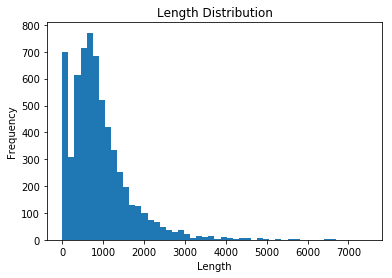

In [11]:
len_vis(df['reviewtext'])

### Count_unique method

In [12]:
def count_unique(words):
    uniq = set()
    for sentence in words:
        for word in sentence:
            uniq.add(word)
    return len(uniq)

### Tokenize

In [13]:
#tokenize without the punctuation
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
# make reviews lowercase
df['reviewtext'] = df['reviewtext'].apply(lambda x: x.lower())
# tokenize
df['reviewtext'] = df['reviewtext'].apply(lambda x: tokenizer.tokenize(x))
# visual check
df.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,len
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007","[nice, marriot, view, of, my, king, bed, room]",good,43
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","[good, hotel, charges, for, internet, access, ...",good,1170
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007","[small, but, adequate, rooms, if, you, have, a...",good,668
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","[better, than, average, some, noisy, rooms, i,...",good,3529
4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007","[ordinary, although, it, is, highly, rated, in...",bad,1143


In [14]:
# Check feature count
count_unique(df['reviewtext'])

21602

In [15]:
#test = pd.read_csv("Test-1555730055539.csv")

In [16]:
# make reviews lowercase
#test['reviewtext'] = test['reviewtext'].apply(lambda x: x.lower())
# tokenize
#test['reviewtext'] = test['reviewtext'].apply(lambda x: tokenizer.tokenize(x))

In [17]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### POS Tagging/Removal

In [18]:
# POS tag
df['posr']= df['reviewtext'].apply(lambda x: nltk.pos_tag(x))
# Leave the non POS removal ones alone
df['nposr'] = df['reviewtext']

In [19]:
#test['posr']= test['reviewtext'].apply(lambda x: nltk.pos_tag(x))
# Leave the non POS removal ones alone
#test['nposr'] = test['reviewtext']

In [20]:
df.tail()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,len,posr,nposr
6282,Review_6283,hotel_200,hotel_10272,"Jul 31, 2004","[a, very, nice, boutique, hotel, had, a, recen...",good,411,"[(a, DT), (very, RB), (nice, JJ), (boutique, N...","[a, very, nice, boutique, hotel, had, a, recen..."
6283,Review_6284,hotel_200,hotel_1120,"Jul 16, 2004","[my, home, in, nyc, i, happened, upon, the, gi...",excellent,1090,"[(my, PRP$), (home, NN), (in, IN), (nyc, JJ), ...","[my, home, in, nyc, i, happened, upon, the, gi..."
6284,Review_6285,hotel_200,hotel_7086,"Jul 8, 2004","[fantastic, new, york, hotel, my, husband, and...",excellent,1345,"[(fantastic, JJ), (new, JJ), (york, NN), (hote...","[fantastic, new, york, hotel, my, husband, and..."
6285,Review_6286,hotel_200,hotel_7909,"Jun 18, 2004","[it, s, our, new, favorite, hotel, after, stay...",excellent,468,"[(it, PRP), (s, VBZ), (our, PRP$), (new, JJ), ...","[it, s, our, new, favorite, hotel, after, stay..."
6286,Review_6287,hotel_200,hotel_4472,"May 18, 2004","[terrific, hotel, in, the, union, square, gram...",excellent,1319,"[(terrific, JJ), (hotel, NN), (in, IN), (the, ...","[terrific, hotel, in, the, union, square, gram..."


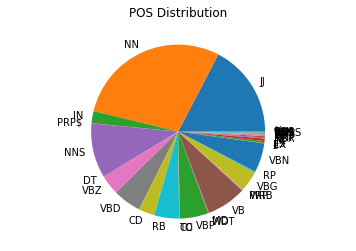

In [21]:
# Visualize Parts of Speech
pos_dict = {}
for sent in df['posr']:
    for pair in sent:
        if pair[1] in pos_dict:
            pos_dict[pair[1]].add(pair[0])
        else:
            pos_dict.update({pair[1]: set(pair[0])})

# Pie chart of POS distribution
temp = pos_dict.values()
x_list = []
for x in temp: 
    x_list.append(len(x))
label_list = pos_dict.keys()
pyplot.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list) 
plt.title("POS Distribution")
plt.show()

In [22]:
# Collection of adjectives, nouns, adverbs and verbs to keep
pos_keep = ["JJ","JJR","JJS","NN","NNP","NNS","RB","RBR","VB","VBD","VBG","VBN","VBZ"]


def remove_pos(full):
    redc =[]
    for pair in full:
        if pair[1] in pos_keep:
            redc.append(pair[0])
    return redc
# Remove the words that are not in pos_keep
df['posr']= df['posr'].apply(lambda x: remove_pos(x))

df.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,len,posr,nposr
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007","[nice, marriot, view, of, my, king, bed, room]",good,43,"[nice, marriot, view, king, bed, room]","[nice, marriot, view, of, my, king, bed, room]"
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","[good, hotel, charges, for, internet, access, ...",good,1170,"[good, hotel, charges, internet, access, marri...","[good, hotel, charges, for, internet, access, ..."
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007","[small, but, adequate, rooms, if, you, have, a...",good,668,"[small, adequate, rooms, early, morning, fligh...","[small, but, adequate, rooms, if, you, have, a..."
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","[better, than, average, some, noisy, rooms, i,...",good,3529,"[better, average, noisy, rooms, stayed, hotel,...","[better, than, average, some, noisy, rooms, i,..."
4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007","[ordinary, although, it, is, highly, rated, in...",bad,1143,"[ordinary, is, highly, rated, reviews, premium...","[ordinary, although, it, is, highly, rated, in..."


In [23]:
#test['posr']= test['posr'].apply(lambda x: remove_pos(x))

In [24]:
print(count_unique(df['posr']))

20133


### Remove Stopwords

In [25]:
# Import the list of stopwords from NLTK
from nltk.corpus import stopwords

# Remove the stopwords and store in "No Stops" column
stop = set(stopwords.words('english'))
# Ensure "not" is kept
stop.remove("not")
df['posr_stpd'] = df['posr'].apply(lambda x: [item for item in x if item not in stop])
df['nposr_stpd'] = df['nposr'].apply(lambda x: [item for item in x if item not in stop])
df['posr_nstpd'] = df['posr']
df['nposr_nstpd'] = df['nposr']
# visual check
df.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,len,posr,nposr,posr_stpd,nposr_stpd,posr_nstpd,nposr_nstpd
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007","[nice, marriot, view, of, my, king, bed, room]",good,43,"[nice, marriot, view, king, bed, room]","[nice, marriot, view, of, my, king, bed, room]","[nice, marriot, view, king, bed, room]","[nice, marriot, view, king, bed, room]","[nice, marriot, view, king, bed, room]","[nice, marriot, view, of, my, king, bed, room]"
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","[good, hotel, charges, for, internet, access, ...",good,1170,"[good, hotel, charges, internet, access, marri...","[good, hotel, charges, for, internet, access, ...","[good, hotel, charges, internet, access, marri...","[good, hotel, charges, internet, access, marri...","[good, hotel, charges, internet, access, marri...","[good, hotel, charges, for, internet, access, ..."
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007","[small, but, adequate, rooms, if, you, have, a...",good,668,"[small, adequate, rooms, early, morning, fligh...","[small, but, adequate, rooms, if, you, have, a...","[small, adequate, rooms, early, morning, fligh...","[small, adequate, rooms, early, morning, fligh...","[small, adequate, rooms, early, morning, fligh...","[small, but, adequate, rooms, if, you, have, a..."
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","[better, than, average, some, noisy, rooms, i,...",good,3529,"[better, average, noisy, rooms, stayed, hotel,...","[better, than, average, some, noisy, rooms, i,...","[better, average, noisy, rooms, stayed, hotel,...","[better, average, noisy, rooms, stayed, hotel,...","[better, average, noisy, rooms, stayed, hotel,...","[better, than, average, some, noisy, rooms, i,..."
4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007","[ordinary, although, it, is, highly, rated, in...",bad,1143,"[ordinary, is, highly, rated, reviews, premium...","[ordinary, although, it, is, highly, rated, in...","[ordinary, highly, rated, reviews, premium, pr...","[ordinary, although, highly, rated, reviews, p...","[ordinary, is, highly, rated, reviews, premium...","[ordinary, although, it, is, highly, rated, in..."


In [26]:
#test['posr_stpd'] = test['posr'].apply(lambda x: [item for item in x if item not in stop])
#test['nposr_stpd'] = test['nposr'].apply(lambda x: [item for item in x if item not in stop])
#test['posr_nstpd'] = test['posr']
#test['nposr_nstpd'] = test['nposr']

In [27]:
# check feature count
count_unique(df['posr_stpd'])

20047

### Stemming

#### Going to test three different stemmers. Porter, Snowball, Lancaster

In [28]:
ps = nltk.PorterStemmer()
ss = nltk.SnowballStemmer('english')
ls = nltk.LancasterStemmer()

# No Stemming
df['nposr_nstpd_nstem'] = df['nposr_nstpd']
df['posr_nstpd_nstem'] = df['posr_nstpd']
df['nposr_stpd_nstem'] = df['nposr_stpd']
df['posr_stpd_nstem'] = df['posr_stpd']
# Porter
df['nposr_nstpd_port'] = df['nposr_nstpd'].apply(lambda x: [ps.stem(y) for y in x])
df['posr_nstpd_port'] = df['posr_nstpd'].apply(lambda x: [ps.stem(y) for y in x])
df['nposr_stpd_port'] = df['nposr_stpd'].apply(lambda x: [ps.stem(y) for y in x])
df['posr_stpd_port'] = df['posr_stpd'].apply(lambda x: [ps.stem(y) for y in x])
# Snowball
df['nposr_nstpd_snow'] = df['nposr_nstpd'].apply(lambda x: [ss.stem(y) for y in x])
df['posr_nstpd_snow'] = df['posr_nstpd'].apply(lambda x: [ss.stem(y) for y in x])
df['nposr_stpd_snow'] = df['nposr_stpd'].apply(lambda x: [ss.stem(y) for y in x])
df['posr_stpd_snow'] = df['posr_stpd'].apply(lambda x: [ss.stem(y) for y in x])
# Lancaster
df['nposr_nstpd_lanc'] = df['nposr_nstpd'].apply(lambda x: [ls.stem(y) for y in x])
df['posr_nstpd_lanc'] = df['posr_nstpd'].apply(lambda x: [ls.stem(y) for y in x])
df['nposr_stpd_lanc'] = df['nposr_stpd'].apply(lambda x: [ls.stem(y) for y in x])
df['posr_stpd_lanc'] = df['posr_stpd'].apply(lambda x: [ls.stem(y) for y in x])

df.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,len,posr,nposr,posr_stpd,...,nposr_stpd_port,posr_stpd_port,nposr_nstpd_snow,posr_nstpd_snow,nposr_stpd_snow,posr_stpd_snow,nposr_nstpd_lanc,posr_nstpd_lanc,nposr_stpd_lanc,posr_stpd_lanc
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007","[nice, marriot, view, of, my, king, bed, room]",good,43,"[nice, marriot, view, king, bed, room]","[nice, marriot, view, of, my, king, bed, room]","[nice, marriot, view, king, bed, room]",...,"[nice, marriot, view, king, bed, room]","[nice, marriot, view, king, bed, room]","[nice, marriot, view, of, my, king, bed, room]","[nice, marriot, view, king, bed, room]","[nice, marriot, view, king, bed, room]","[nice, marriot, view, king, bed, room]","[nic, marriot, view, of, my, king, bed, room]","[nic, marriot, view, king, bed, room]","[nic, marriot, view, king, bed, room]","[nic, marriot, view, king, bed, room]"
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","[good, hotel, charges, for, internet, access, ...",good,1170,"[good, hotel, charges, internet, access, marri...","[good, hotel, charges, for, internet, access, ...","[good, hotel, charges, internet, access, marri...",...,"[good, hotel, charg, internet, access, marriot...","[good, hotel, charg, internet, access, marriot...","[good, hotel, charg, for, internet, access, th...","[good, hotel, charg, internet, access, marriot...","[good, hotel, charg, internet, access, marriot...","[good, hotel, charg, internet, access, marriot...","[good, hotel, charg, for, internet, access, th...","[good, hotel, charg, internet, access, marriot...","[good, hotel, charg, internet, access, marriot...","[good, hotel, charg, internet, access, marriot..."
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007","[small, but, adequate, rooms, if, you, have, a...",good,668,"[small, adequate, rooms, early, morning, fligh...","[small, but, adequate, rooms, if, you, have, a...","[small, adequate, rooms, early, morning, fligh...",...,"[small, adequ, room, earli, morn, flight, catc...","[small, adequ, room, earli, morn, flight, catc...","[small, but, adequ, room, if, you, have, an, e...","[small, adequ, room, earli, morn, flight, catc...","[small, adequ, room, earli, morn, flight, catc...","[small, adequ, room, earli, morn, flight, catc...","[smal, but, adequ, room, if, you, hav, an, ear...","[smal, adequ, room, ear, morn, flight, catch, ...","[smal, adequ, room, ear, morn, flight, catch, ...","[smal, adequ, room, ear, morn, flight, catch, ..."
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","[better, than, average, some, noisy, rooms, i,...",good,3529,"[better, average, noisy, rooms, stayed, hotel,...","[better, than, average, some, noisy, rooms, i,...","[better, average, noisy, rooms, stayed, hotel,...",...,"[better, averag, noisi, room, stay, hotel, tim...","[better, averag, noisi, room, stay, hotel, tim...","[better, than, averag, some, noisi, room, i, h...","[better, averag, noisi, room, stay, hotel, few...","[better, averag, noisi, room, stay, hotel, tim...","[better, averag, noisi, room, stay, hotel, tim...","[bet, than, av, som, noisy, room, i, hav, stay...","[bet, av, noisy, room, stay, hotel, few, tim, ...","[bet, av, noisy, room, stay, hotel, tim, inth,...","[bet, av, noisy, room, stay, hotel, tim, inth,..."
4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007","[ordinary, although, it, is, highly, rated, in...",bad,1143,"[ordinary, is, highly, rated, reviews, premium...","[ordinary, although, it, is, highly, rated, in...","[ordinary, highly, rated, reviews, premium, pr...",...,"[ordinari, although, highli, rate, review, pay...","[ordinari, highli, rate, review, premium, pric...","[ordinari, although, it, is, high, rate, in, t...","[ordinari, is, high, rate, review, premium, pr...","[ordinari, although, high, rate, review, pay, ...","[ordinari, high, rate, review, premium, price,...","[ordin, although, it, is, high, rat, in, thes,...","[ordin, is, high, rat, review, prem, pric, com...","[ordin, although, high, rat, review, pay, prem...

In [29]:
df.shape

(6287, 29)

### Saving the file to disk for later use if required

In [30]:
# put final to csv just in case need a file
df.to_csv('final.csv')

### Test and Evaluate with Logistic Regression, Naive Bayes, k-fold

In [31]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


### Import sklearn and NLTK Library and Modules

In [32]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

from sklearn.linear_model import LogisticRegression
from nltk.classify.scikitlearn import SklearnClassifier
logreg = SklearnClassifier(LogisticRegression())

### Function to Convert the Data into a Feature Set

In [33]:
## Transform data into list of ([tokens],sentiment label)
def createTrainingDataNLTK(sentences,labels):
    rdata = np.vstack([sentences,labels])
    rdata = np.transpose(rdata)
    data = list();
    for i in range(0,len(rdata)):
        tokens = rdata[i][0].split(" ")
        d_tuple = (tokens, rdata[i][1]);
        data.append(d_tuple)
    return data;

In [34]:
# create a list of all possible feature reduction permutations in the order of stopword removal_pos_stem
featurereductions = ['nposr_nstpd_nstem']

In [35]:
# merge the words into sentence to use current implementation of createTrainingData
def create_nltk_train_data (feature_reduction):
    df['sentences'] = df[feature_reduction].apply(lambda x: " ".join(x))
    x_label = "sentences"
    y_label = "Sentiment"
    nltk_train_data = createTrainingDataNLTK(df[x_label],df[y_label])
    return nltk_train_data
    

In [43]:
df.head(2)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,len,posr,nposr,posr_stpd,...,posr_stpd_port,nposr_nstpd_snow,posr_nstpd_snow,nposr_stpd_snow,posr_stpd_snow,nposr_nstpd_lanc,posr_nstpd_lanc,nposr_stpd_lanc,posr_stpd_lanc,sentences
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007","[nice, marriot, view, of, my, king, bed, room]",good,43,"[nice, marriot, view, king, bed, room]","[nice, marriot, view, of, my, king, bed, room]","[nice, marriot, view, king, bed, room]",...,"[nice, marriot, view, king, bed, room]","[nice, marriot, view, of, my, king, bed, room]","[nice, marriot, view, king, bed, room]","[nice, marriot, view, king, bed, room]","[nice, marriot, view, king, bed, room]","[nic, marriot, view, of, my, king, bed, room]","[nic, marriot, view, king, bed, room]","[nic, marriot, view, king, bed, room]","[nic, marriot, view, king, bed, room]",nice marriot view of my king bed room
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","[good, hotel, charges, for, internet, access, ...",good,1170,"[good, hotel, charges, internet, access, marri...","[good, hotel, charges, for, internet, access, ...","[good, hotel, charges, internet, access, marri...",...,"[good, hotel, charg, internet, access, marriot...","[good, hotel, charg, for, internet, access, th...","[good, hotel, charg, internet, access, marriot...","[good, hotel, charg, internet, access, marriot...","[good, hotel, charg, internet, access, marriot...","[good, hotel, charg, for, internet, access, th...","[good, hotel, charg, internet, access, marriot...","[good, hotel, charg, internet, access, marriot...","[good, hotel, charg, internet, access, marriot...",good hotel charges for internet access the mar...


In [44]:
df.shape

(6287, 30)

### Functions to Train the Classifers and Run it Against Test Data

In [45]:
# returns the accuracy of the test data for Naive Bayes
# when predicted against fitted training data
def train1(training_set,test_set):
    
    sentim_analyzer = SentimentAnalyzer()
    all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_set])
    unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
    sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)
    
    training_set = sentim_analyzer.apply_features(training_set)
    test_set = sentim_analyzer.apply_features(test_set)
                                              
    trainer = NaiveBayesClassifier.train
    classifier = sentim_analyzer.train(trainer, training_set)
    results = sentim_analyzer.evaluate(test_set).items()                             
    return results

In [46]:
# returns the accuracy of the test data for Logistic Regression
# when predicted against fitted training data
def train2(training_set,test_set):
    
    sentim_analyzer = SentimentAnalyzer()
    all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_set])
    unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
    sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)
    
    training_set = sentim_analyzer.apply_features(training_set)
    test_set = sentim_analyzer.apply_features(test_set)
                                              
    trainer = logreg.train
    classifier = sentim_analyzer.train(trainer, training_set)
    results = sentim_analyzer.evaluate(test_set).items()                             
    return results

### K-Fold Cross Validation

In [47]:
## A custom parser function to interpret results of training function
def nltk_parser(results,summer):
    for key,value in sorted(results):
        #print('{0}: {1}'.format(key, value))
        if key == "Accuracy": summer += value;
    print
    return summer

In [48]:
## k-fold cross validation designed to be agnostic to training data and training function
def k_fold_validation(k,data,train_func,parser):
    
    b_length = len(data)/k; # the testing bucket length
    sum_acc = 0; # Use this for average accuracy
    print (k, "- fold cross validation")
    print ("-----------------------------")
    for i in range(0,k):       
        s_i = i*b_length; # testing interval start index
        f_i = s_i + b_length; # testing interval end index
        test_data = data[s_i:f_i]
        train_data = data[0:s_i]+data[f_i:len(data)];
        metrics = train_func(train_data,test_data);
        sum_acc = parser(metrics,sum_acc);

    print ('\nAverage Accuracy:', sum_acc / k)

In [49]:
## k-fold cross validation designed to be agnostic to training data and training function
# Returns average accuracy
def k_fold_validation_simple(k,data,train_func,parser):
    b_length = len(data)/k; # the testing bucket length
    sum_acc = 0; # Use this for average accuracy
    for i in range(0,k):       
        s_i = i*b_length; # testing interval start index
        f_i = s_i + b_length; # testing interval end index
        test_data = data[1787:]
        train_data = data[:4500];
        metrics = train_func(train_data,test_data);
        sum_acc = parser(metrics,sum_acc);
    return sum_acc / k;

### Test Accuracy Using K-Fold Cross Validation

In [50]:
K = 1; # Constant for K-fold cross validation
accuracies =[]
dict_metrics_nb = {}
for i in range(0, len(featurereductions)):
    nltk_train_data = create_nltk_train_data (featurereductions[i])
    print (featurereductions[i])
    accuracies.append(k_fold_validation_simple(K,nltk_train_data,train1,nltk_parser))
    # creates a dict with featurereduction techniques, accuracy, and feature counts
    dict_metrics_nb.update({featurereductions[i]: accuracies[i]})
    print (accuracies[i])

nposr_nstpd_nstem
Training classifier
Evaluating NaiveBayesClassifier results...
0.6275555555555555


In [54]:
K = 1; # Constant for K-fold cross validation
accuracies2 = []
dict_metrics_lr = {}
for i in range(0, len(featurereductions)):
    nltk_train_data = create_nltk_train_data (featurereductions[i])
    print (featurereductions[i])
    accuracies2.append(k_fold_validation_simple(K,nltk_train_data,train2,nltk_parser))
    # creates a dict with featurereduction techniques, accuracy, and feature counts
    dict_metrics_lr.update({featurereductions[i]: accuracies2[i]})
    print (accuracies2[i])

nposr_nstpd_nstem
Training classifier


KeyboardInterrupt: 